In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import zipfile
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)}) 
# set the precision of 2 decimal place.
pd.set_option('display.precision',2)
# pd.options.display.float_format = '{:,.2f}'.format
# zipfile.ZipFile('flight-delays.zip').extractall('.')

- sns.set(rc={'figure.figsize':(12,8)}): This line sets the default figure size for seaborn plots to be 12 inches in width and 8 inches in height. It affects the size of the figures created by seaborn plotting functions.

- pd.set_option('display.precision', 2): This line sets the precision of floating-point numbers displayed in pandas DataFrames to 2 decimal places. It affects how numeric values are shown when printing DataFrames.

- pd.options.display.float_format = '{:,.2f}'.format: This line seems to be a commented-out line of code. It's a way to set a specific format for displaying floating-point numbers in pandas DataFrames. However, it's currently commented out (denoted by # at the beginning), so it won't affect the code's execution.

- zipfile.ZipFile('flight-delays.zip').extractall('.'): This line seems to be commented out as well. It suggests extracting the contents of a ZIP file named 'flight-delays.zip' to the current directory using Python's zipfile module. However, it's commented out, so it won't be executed unless the comment symbol (#) is removed.

In [3]:
import plotly.offline as py
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)


- This code is typically used in a Jupyter Notebook environment (init_notebook_mode(connected=True)) to enable Plotly's offline mode for rendering and displaying interactive plots directly within the notebook interface.

# Data Overview

In [4]:
path = '../Airplanes Project/'
# read data of flight.csv
# a warning claims 'ORIGIN_AIRPORT' and 'DESTINATION_AIRPORT' have type of int data
flight_raw = pd.read_csv(path+'flights.csv', dtype={'ORIGIN_AIRPORT': str, 
                                               'DESTINATION_AIRPORT': str})

- path = '../input/flight-delays/': Sets the variable path to the directory path where the 'flights.csv' file is located. The '..' in the path means it's referencing the parent directory.

- flight_raw = pd.read_csv(path+'flights.csv', dtype={'ORIGIN_AIRPORT': str, 'DESTINATION_AIRPORT': str}): Reads the 'flights.csv' file using pandas' read_csv function. The dtype parameter is used to specify the data types of columns during the reading process. In this case, it's explicitly specifying that the columns 'ORIGIN_AIRPORT' and 'DESTINATION_AIRPORT' should be read as strings (str). 

In [5]:
# over 5 million rows, over 30 columns, quite a big data.
flight_raw.shape

(5819079, 31)

### Raw Variables (Column Names)
**YEAR**: Year of the Flight Trip  
**MONTH**: Month of the Flight Trip  
**DAY**: Day of the Flight Trip  
**DAY_OF_WEEK**: Day of week of the Flight Trip  
**AIRLINE**: Airline Identifier  
**FLIGHT_NUMBER**: Flight Identifier  
**TAIL_NUMBER**: Aircraft Identifier  
**ORIGIN_AIRPORT**: Starting Airport  
**DESTINATION_AIRPORT**: Destination Airport  
**SCHEDULED_DEPARTURE**: Planned Departure Time  
**DEPARTURE_TIME**: WHEEL_OFF - TAXI_OUT  
**DEPARTURE_DELAY**: Total Delay on Departure  
**TAXI_OUT**: The time duration elapsed between departure from the origin airport gate and wheels off. "Taxi out" refers to the period of time an aircraft spends moving on the ground under its own power from the departure gate or terminal area to the takeoff runway. It begins when the airplane starts its engines for departure and ends when the aircraft reaches the runway for takeoff. During taxi out, the airplane navigates the airport taxiways, following specific paths and instructions from air traffic control. Pilots communicate with ground control, adhere to traffic patterns, and taxi to the designated runway where they will perform pre-takeoff checks before initiating the takeoff roll.

**WHEELS_OFF**: The time point that the aircraft's wheels leave the ground. "Wheels off" refers to the moment when an aircraft's wheels leave the ground during takeoff and the airplane becomes airborne. It's the point at which the aircraft transitions from being on the runway to being in flight.

**SCHEDULED_TIME**: Planned time amount needed for the flight trip  
**ELAPSED_TIME**: AIR_TIME + TAXI_IN + TAXI_OUT  
**AIR_TIME**: The time duration between wheels_off and wheels_on time  
**DISTANCE**: Distance between two airports  
**WHEELS_ON**: The time point that the aircraft's wheels touch on the ground  
**TAXI_IN**: The time duration elapsed between wheels-on and gate arrival at the destination airport  
**SCHEDULED_ARRIVAL**: Planned arrival time  
**ARRIVAL_TIME**: WHEELS_ON + TAXI_IN  
**ARRIVAL_DELAY**: ARRIVAL_TIME - SCHEDULED_ARRIVAL  
**DIVERTED**: Aircraft landed on airport that out of schedule  
**CANCELLED**: Flight Cancelled (1 = cancelled)  
**CANCELLATION_REASON**: Reason for Cancellation of flight: A - Airline/Carrier; B - Weather; C - National Air System; D - Security  
**AIR_SYSTEM_DELAY**: Delay caused by air system  
**SECURITY_DELAY**: Delay caused by security  
**AIRLINE_DELAY**: Delay caused by the airline  
**LATE_AIRCRAFT_DELAY**: Delay caused by aircraft  
**WEATHER_DELAY**: Delay caused by weather  

- The "National Air System" generally refers to the entire infrastructure and network of airports, air traffic control systems, airspace, regulations, and related facilities that collectively manage and facilitate air travel within a specific country.

In [6]:
# take a look at the basic statistics
flight_raw.loc[:,['DEPARTURE_TIME', 'DEPARTURE_DELAY',
                  'AIR_TIME', 'DISTANCE', 'ARRIVAL_TIME', 
                  'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED'
                 ]].describe()

,DEPARTURE_TIME,DEPARTURE_DELAY,AIR_TIME,DISTANCE,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED
count,5.73e+06,5.73e+06,5.71e+06,5.82e+06,5.73e+06,5.71e+06,5.82e+06,5.82e+06
mean,1.34e+03,9.37e+00,1.14e+02,8.22e+02,1.48e+03,4.41e+00,2.61e-03,1.54e-02
std,4.96e+02,3.71e+01,7.22e+01,6.08e+02,5.26e+02,3.93e+01,5.10e-02,1.23e-01
min,1.00e+00,-8.20e+01,7.00e+00,2.10e+01,1.00e+00,-8.70e+01,0.00e+00,0.00e+00
25%,9.21e+02,-5.00e+00,6.00e+01,3.73e+02,1.06e+03,-1.30e+01,0.00e+00,0.00e+00
50%,1.33e+03,-2.00e+00,9.40e+01,6.47e+02,1.51e+03,-5.00e+00,0.00e+00,0.00e+00
75%,1.74e+03,7.00e+00,1.44e+02,1.06e+03,1.92e+03,8.00e+00,0.00e+00,0.00e+00
max,2.40e+03,1.99e+03,6.90e+02,4.98e+03,2.40e+03,1.97e+03,1.00e+00,1.00e+00


Quartiles are statistical measures that divide a dataset into four equal parts, each containing approximately 25% of the data. These parts are called quartiles because they split the data into quarters.

There are three quartiles:

First Quartile (Q1): This is the value below which 25% of the data lies. It is also known as the lower quartile or the 25th percentile.

Second Quartile (Q2): This is the median of the dataset. It's the value below which 50% of the data lies. It's also referred to as the 50th percentile. For an odd number of data points, the median is the middle value. For an even number of data points, it's the average of the two middle values.

Third Quartile (Q3): This is the value below which 75% of the data lies. It's also known as the upper quartile or the 75th percentile.

Quartiles are useful for understanding the spread and distribution of a dataset. They help identify the range within which the middle 50% of the data falls and provide insights into the dispersion of values.

<hr>

5.73: This is the significand or coefficient, also known as the mantissa, representing the base value. In this case, it's 5.73.

e: Stands for "exponent" and indicates that the number is in scientific notation.

+06: Denotes the power of 10 by which the significand is multiplied. In this case, it's 10 raised to the power of 6 (because of the "+06"), which means the number is multiplied by 10 to the power of 6 (or 1,000,000).

So, "5.73e+06" is equivalent to the standard notation of 5,730,000.

<hr>

This function, count_NA_levels(data), is designed to analyze a dataset column-wise to determine the number of unique values present in each column and the count of missing values (NaN) in those columns.

This function aids in understanding the data quality by providing insights into the presence of missing values and the diversity of unique values across different columns within the dataset.

In [7]:
# Count the number of NAN and different values in each column
def count_NA_levels(data):
    for i in data.columns:
        x = data[i].unique()
        y = data[i]
        count_na = data.shape[0] - (y.dropna(axis=0, how='any')).shape[0]
        if count_na > 0:
            print(i + '({} NaN): '.format(count_na) + str(len(x)))
        else:
            print(i + '(no NaN): ' + str(len(x)))

- axis = 1 : operation would be performed for all the values in different columns for every row
- axis = 0 : operation would be performed for all the values in different rows for every column

- For a Series (which is essentially a single column from a DataFrame), axis=0 is the default value and implies that operations are performed along the single dimension available (as there are no columns to traverse).

<hr>

def count_NA_levels(data):

This line defines a function named count_NA_levels that takes a parameter data, which is assumed to be a DataFrame.
for i in data.columns:

This initiates a loop that iterates through each column (i) in the DataFrame data.
x = data[i].unique()

Retrieves unique values in the current column (i) and assigns them to the variable x.
y = data[i]

Assigns the entire column i to the variable y.
count_na = data.shape[0] - (y.dropna(axis=0, how='any')).shape[0]

Counts the number of NaN values in the column by:
y.dropna(axis=0, how='any'): Drops rows with any NaN values in the column (axis=0 implies rows).
(y.dropna(axis=0, how='any')).shape[0]: Retrieves the number of remaining rows after dropping NaN values.
data.shape[0] - ...: Subtracts this count from the total number of rows in the original DataFrame (data) to determine the count of NaN values.
if count_na > 0:

Checks if the count of NaN values (count_na) is greater than zero.
print(i + '({} NaN): '.format(count_na) + str(len(x)))

If there are NaN values in the column (count_na > 0), it prints the column name (i), the count of NaN values, and the count of unique values in that column (len(x)).
else:

If there are no NaN values in the column (count_na = 0), it prints the column name (i), and the count of unique values in that column (len(x)).

y: Represents a Series or a single column from a DataFrame.

.dropna(): This is a Pandas method that removes missing values from the data.

axis=0: Specifies the axis along which the operation is performed. In this context, axis=0 indicates that the operation is performed along the rows (axis=0 refers to rows in a DataFrame).

how='any': Specifies the criteria for dropping rows. When how='any', it means that any row containing at least one NaN value in the specified column (y) will be dropped.

In [8]:
count_NA_levels(flight_raw)

YEAR(no NaN): 1
MONTH(no NaN): 12
DAY(no NaN): 31
DAY_OF_WEEK(no NaN): 7
AIRLINE(no NaN): 14
FLIGHT_NUMBER(no NaN): 6952
TAIL_NUMBER(14721 NaN): 4898
ORIGIN_AIRPORT(no NaN): 628
DESTINATION_AIRPORT(no NaN): 629
SCHEDULED_DEPARTURE(no NaN): 1321
DEPARTURE_TIME(86153 NaN): 1441
DEPARTURE_DELAY(86153 NaN): 1218
TAXI_OUT(89047 NaN): 185
WHEELS_OFF(89047 NaN): 1441
SCHEDULED_TIME(6 NaN): 551
ELAPSED_TIME(105071 NaN): 713
AIR_TIME(105071 NaN): 676
DISTANCE(no NaN): 1363
WHEELS_ON(92513 NaN): 1441
TAXI_IN(92513 NaN): 186
SCHEDULED_ARRIVAL(no NaN): 1435
ARRIVAL_TIME(92513 NaN): 1441
ARRIVAL_DELAY(105071 NaN): 1241
DIVERTED(no NaN): 2
CANCELLED(no NaN): 2
CANCELLATION_REASON(5729195 NaN): 5
AIR_SYSTEM_DELAY(4755640 NaN): 571
SECURITY_DELAY(4755640 NaN): 155
AIRLINE_DELAY(4755640 NaN): 1068
LATE_AIRCRAFT_DELAY(4755640 NaN): 696
WEATHER_DELAY(4755640 NaN): 633


<hr>

This code snippet essentially creates a new DataFrame (flight_dropna) by eliminating rows with missing values specifically from the columns 'ARRIVAL_DELAY' and 'DEPARTURE_DELAY' in the original flight_raw DataFrame. This data cleaning process helps in handling missing values and ensuring data integrity for further analysis or modeling purposes.

In [9]:
flight_dropna = flight_raw.dropna(axis=0, how='any', 
                                  subset=['ARRIVAL_DELAY', 'DEPARTURE_DELAY'])

In [10]:
count_NA_levels(flight_dropna)

YEAR(no NaN): 1
MONTH(no NaN): 12
DAY(no NaN): 31
DAY_OF_WEEK(no NaN): 7
AIRLINE(no NaN): 14
FLIGHT_NUMBER(no NaN): 6946
TAIL_NUMBER(no NaN): 4896
ORIGIN_AIRPORT(no NaN): 628
DESTINATION_AIRPORT(no NaN): 629
SCHEDULED_DEPARTURE(no NaN): 1320
DEPARTURE_TIME(no NaN): 1440
DEPARTURE_DELAY(no NaN): 1212
TAXI_OUT(no NaN): 184
WHEELS_OFF(no NaN): 1440
SCHEDULED_TIME(no NaN): 549
ELAPSED_TIME(no NaN): 712
AIR_TIME(no NaN): 675
DISTANCE(no NaN): 1350
WHEELS_ON(no NaN): 1440
TAXI_IN(no NaN): 184
SCHEDULED_ARRIVAL(no NaN): 1434
ARRIVAL_TIME(no NaN): 1440
ARRIVAL_DELAY(no NaN): 1240
DIVERTED(no NaN): 1
CANCELLED(no NaN): 1
CANCELLATION_REASON(5714008 NaN): 1
AIR_SYSTEM_DELAY(4650569 NaN): 571
SECURITY_DELAY(4650569 NaN): 155
AIRLINE_DELAY(4650569 NaN): 1068
LATE_AIRCRAFT_DELAY(4650569 NaN): 696
WEATHER_DELAY(4650569 NaN): 633


In [11]:
flight_dropna.shape

(5714008, 31)

<hr>

The provided code snippet creates a new DataFrame named flight_clean by selecting specific columns from the previously processed DataFrame flight_dropna.

This code snippet essentially filters and creates a new DataFrame flight_clean containing specific columns of interest from the flight_dropna DataFrame. These selected columns likely represent essential attributes relevant to further analysis or modeling within the context of flight-related data.

In [12]:
flight_clean = flight_dropna.loc[:,['MONTH','DAY','DAY_OF_WEEK',
                           'AIRLINE','ORIGIN_AIRPORT','DESTINATION_AIRPORT',
                           'DEPARTURE_DELAY','ARRIVAL_DELAY', 'DISTANCE',
                           'AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY',
                           'LATE_AIRCRAFT_DELAY','WEATHER_DELAY'
                          ]]

In [13]:
flight_clean.shape

(5714008, 14)

In [14]:
count_NA_levels(flight_clean)

MONTH(no NaN): 12
DAY(no NaN): 31
DAY_OF_WEEK(no NaN): 7
AIRLINE(no NaN): 14
ORIGIN_AIRPORT(no NaN): 628
DESTINATION_AIRPORT(no NaN): 629
DEPARTURE_DELAY(no NaN): 1212
ARRIVAL_DELAY(no NaN): 1240
DISTANCE(no NaN): 1350
AIR_SYSTEM_DELAY(4650569 NaN): 571
SECURITY_DELAY(4650569 NaN): 155
AIRLINE_DELAY(4650569 NaN): 1068
LATE_AIRCRAFT_DELAY(4650569 NaN): 696
WEATHER_DELAY(4650569 NaN): 633


<hr>

The provided code snippet creates a new DataFrame named delay_over15min by dropping rows where all specified columns related to different types of delays ('AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY') contain missing values (NaN).

In [15]:
delay_over15min = flight_clean.dropna(subset=['AIR_SYSTEM_DELAY','SECURITY_DELAY',
                                        'AIRLINE_DELAY','LATE_AIRCRAFT_DELAY',
                                        'WEATHER_DELAY'], how='all')

how='all': Indicates that rows will be dropped only if all the specified columns contain NaN values.

In [16]:
count_NA_levels(delay_over15min)

MONTH(no NaN): 12
DAY(no NaN): 31
DAY_OF_WEEK(no NaN): 7
AIRLINE(no NaN): 14
ORIGIN_AIRPORT(no NaN): 625
DESTINATION_AIRPORT(no NaN): 625
DEPARTURE_DELAY(no NaN): 1190
ARRIVAL_DELAY(no NaN): 1142
DISTANCE(no NaN): 1339
AIR_SYSTEM_DELAY(no NaN): 570
SECURITY_DELAY(no NaN): 154
AIRLINE_DELAY(no NaN): 1067
LATE_AIRCRAFT_DELAY(no NaN): 695
WEATHER_DELAY(no NaN): 632


In [17]:
delay_over15min.shape

(1063439, 14)

<hr>

This code performs a conditional selection on the DataFrame flight_clean to filter and count the number of rows where the 'ARRIVAL_DELAY' column value is greater than or equal to 15.

In [18]:
flight_clean[flight_clean.ARRIVAL_DELAY >= 15].shape

(1063439, 14)

<hr>
<hr>
<hr>

- This line of code filters the DataFrame flight_clean to include only rows where the 'ARRIVAL_DELAY' column has a value greater than or equal to 15, and then retrieves the shape of the resulting DataFrame.

In [19]:
flight = flight_clean.drop(['AIR_SYSTEM_DELAY','SECURITY_DELAY','AIRLINE_DELAY',
                           'LATE_AIRCRAFT_DELAY','WEATHER_DELAY'], axis=1)

- The new DataFrame flight will contain all columns from flight_clean except for the columns listed in the drop() method, which are related to different types of delay information (such as air system delay, security delay, airline delay, late aircraft delay, and weather delay).

In [20]:
flight.shape

(5714008, 9)

In [21]:
# create a column to measure delay or not
# DELAY_OR_NOT: True (ARRIVAL_DELAY > 0), False (ARRIVAL_DELAY <= 0)

flight['DELAY_OR_NOT'] = flight.loc[:, ['ARRIVAL_DELAY']] > 0
flight.head()

,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,DEPARTURE_DELAY,ARRIVAL_DELAY,DISTANCE,DELAY_OR_NOT
0,1,1,4,AS,ANC,SEA,-11.0,-22.0,1448,False
1,1,1,4,AA,LAX,PBI,-8.0,-9.0,2330,False
2,1,1,4,US,SFO,CLT,-2.0,5.0,2296,True
3,1,1,4,AA,LAX,MIA,-5.0,-9.0,2342,False
4,1,1,4,AS,SEA,ANC,-1.0,-21.0,1448,False


flight['DELAY_OR_NOT'] = flight.loc[:, ['ARRIVAL_DELAY']] > 0:

- flight['DELAY_OR_NOT']: Creates a new column named 'DELAY_OR_NOT' in the DataFrame flight.
- flight.loc[:, ['ARRIVAL_DELAY']]: Selects the 'ARRIVAL_DELAY' column as a DataFrame (preserving its DataFrame structure).
- greater than 0: Compares each value in the 'ARRIVAL_DELAY' column with zero. It creates a boolean mask, resulting in True for values greater than zero (indicating a delay) and False for values less than or equal to zero (indicating no delay).

### Variables (Column Names)

**MONTH**: Month of the Flight Trip  
**DAY**: Day of the Flight Trip  
**DAY_OF_WEEK**: Day of week of the Flight Trip  
**AIRLINE**: Airline Identifier  
**ORIGIN_AIRPORT**: Starting Airport  
**DESTINATION_AIRPORT**: Destination Airport  
**DEPARTURE_DELAY**: Total Delay on Departure  
**ARRIVAL_DELAY**: ARRIVAL_TIME - SCHEDULED_ARRIVAL  
**DISTANCE**: Distance between two airports  

**DELAY_OR_NOT**: True (ARRIVAL_DELAY > 0), False (ARRIVAL_DELAY <= 0)

**AIR_SYSTEM_DELAY**: Delay caused by air system  
**SECURITY_DELAY**: Delay caused by security  
**AIRLINE_DELAY**: Delay caused by the airline  
**LATE_AIRCRAFT_DELAY**: Delay caused by aircraft  
**WEATHER_DELAY**: Delay caused by weather  

## Data Analysis and Visualization
### Departure Delay and Arrival Delay

In [22]:
# read data of airlines.csv for the full name of airlines
airline_name = pd.read_csv(path+'airlines.csv')
airline_name

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways
5,OO,Skywest Airlines Inc.
6,AS,Alaska Airlines Inc.
7,NK,Spirit Air Lines
8,WN,Southwest Airlines Co.
9,DL,Delta Air Lines Inc.


In [23]:
# merge the fullname of airline companies into flight data
flight_fullname = flight.rename(columns={'AIRLINE': 'IATA_CODE'})
flight_fullname = flight_fullname.merge(airline_name, on='IATA_CODE')

flight_fullname = flight.rename(columns={'AIRLINE': 'IATA_CODE'}):

Renames the 'AIRLINE' column to 'IATA_CODE' in the DataFrame flight. This is likely done to align column names for merging purposes.
flight_fullname = flight_fullname.merge(airline_name, on='IATA_CODE'):

flight_fullname.merge(airline_name, on='IATA_CODE'): Performs a merge operation between the DataFrame flight_fullname and the DataFrame airline_name based on the common column 'IATA_CODE'.
on='IATA_CODE': Specifies the column used as the key for merging the two DataFrames.

In [24]:
# Make clear on DEPARTURE_DELAY and ARRIVAL_DELAY
# Delay caused before departure or after departure?

airline_deparr_plot = flight_fullname.loc[:, ['AIRLINE', 
                                     'DEPARTURE_DELAY',
                                     'ARRIVAL_DELAY']].groupby('AIRLINE').mean()

flight_fullname.loc[:, ['AIRLINE', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY']]: This selects specific columns ('AIRLINE', 'DEPARTURE_DELAY', 'ARRIVAL_DELAY') from the DataFrame flight_fullname.

.groupby('AIRLINE').mean(): groupby('AIRLINE'): Groups the selected data by unique airline names ('AIRLINE' column), creating separate groups for each unique airline.

.mean(): Calculates the mean (average) of the 'DEPARTURE_DELAY' and 'ARRIVAL_DELAY' columns within each airline group.

airline_deparr_plot : Assigns the resulting DataFrame of mean values for departure and arrival delays per airline to the variable airline_deparr_plot.

In [25]:
airline_deparr_plot

,DEPARTURE_DELAY,ARRIVAL_DELAY
AIRLINE,,
Alaska Airlines Inc.,1.72,-0.98
American Airlines Inc.,8.83,3.45
American Eagle Airlines Inc.,9.97,6.46
Atlantic Southeast Airlines,8.62,6.59
Delta Air Lines Inc.,7.31,0.19
Frontier Airlines Inc.,13.30,12.50
Hawaiian Airlines Inc.,0.47,2.02
JetBlue Airways,11.44,6.68
Skywest Airlines Inc.,7.74,5.85


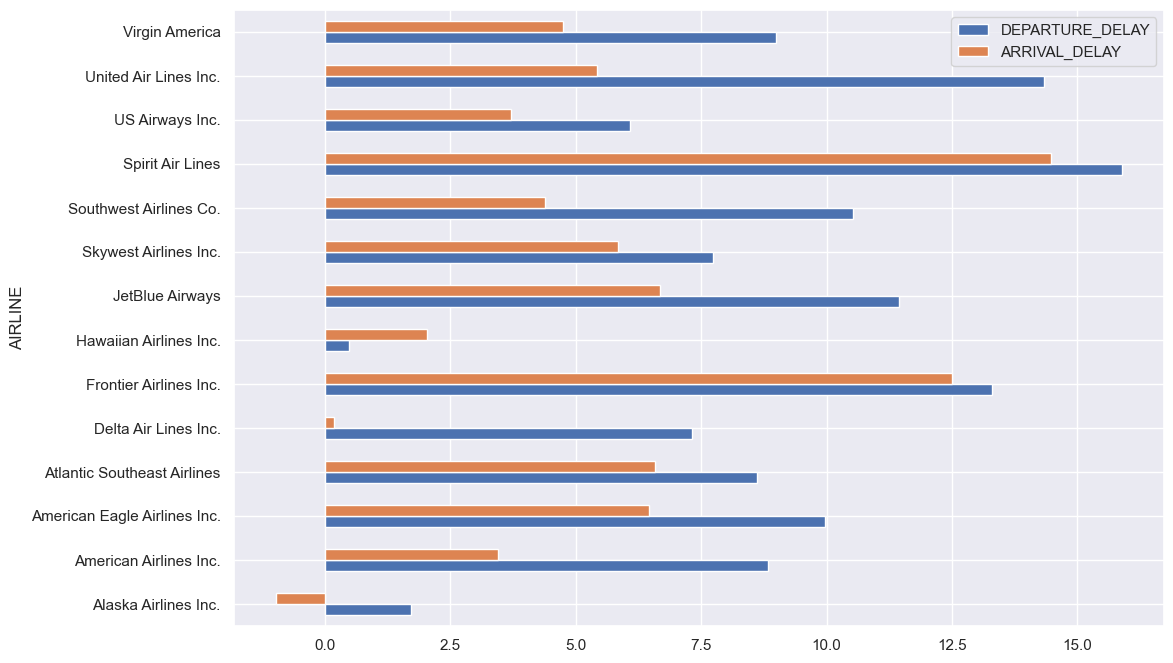

In [26]:
airline_deparr_plot.plot.barh(figsize=(12,8), stacked=False)
plt.show()

airline_deparr_plot.plot.barh(figsize=(12,8), stacked=False):

airline_deparr_plot: Refers to the DataFrame containing mean departure and arrival delays for different airlines.

.plot.barh(): This function creates a horizontal bar plot.

figsize=(12,8): Specifies the size of the figure to be created (12 inches in width and 8 inches in height).

stacked=False: Sets the bars to be displayed without stacking, meaning the bars for departure and arrival delays will be side by side instead of being stacked on top of each other.

plt.show():

Displays the generated plot using Matplotlib's show() function.

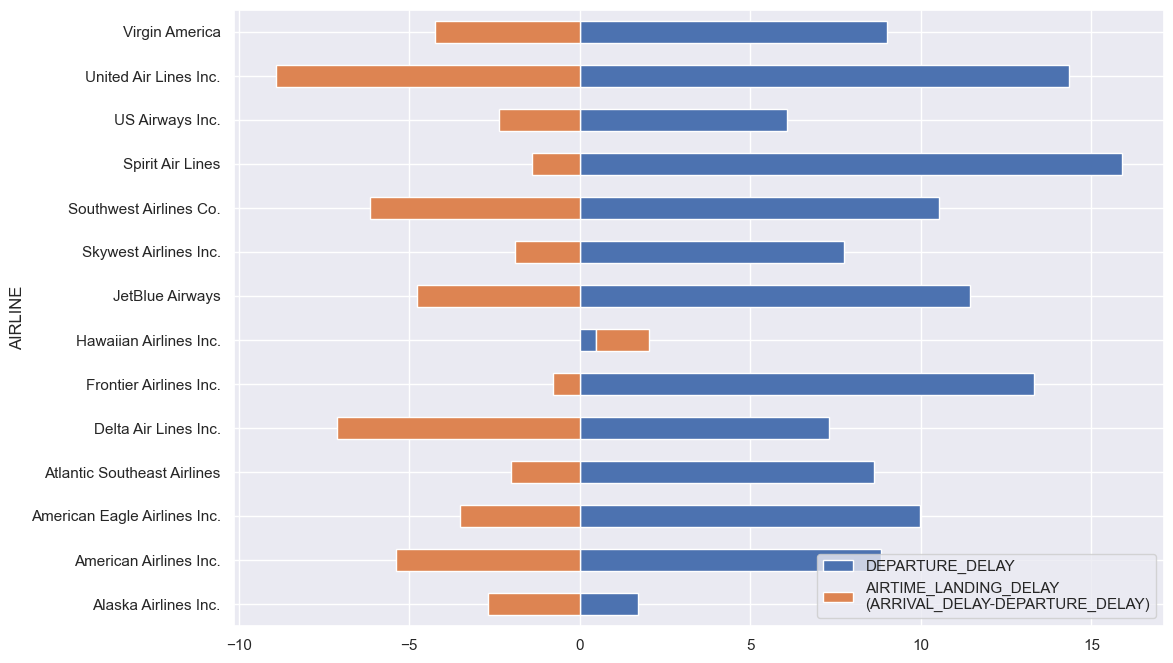

In [27]:
# ARRIVAL_DELAY is the total delay, i.e. delay result of this flight
# extract the delay in the airtime and landing
airline_deparr_plot['ARRIVAL_DELAY'] = (- airline_deparr_plot['DEPARTURE_DELAY'] 
                                        + airline_deparr_plot['ARRIVAL_DELAY'])
ax = airline_deparr_plot.plot.barh(figsize=(12,8), stacked=True)
ax.legend(['DEPARTURE_DELAY', 'AIRTIME_LANDING_DELAY\n(ARRIVAL_DELAY-DEPARTURE_DELAY)'])
# ax.title('')
plt.show()

airline_deparr_plot['ARRIVAL_DELAY'] = (- airline_deparr_plot['DEPARTURE_DELAY'] + airline_deparr_plot['ARRIVAL_DELAY']):

Performs a calculation to extract the delay during airtime and landing by subtracting the 'DEPARTURE_DELAY' from the 'ARRIVAL_DELAY' column, and stores the result back in the 'ARRIVAL_DELAY' column of the DataFrame airline_deparr_plot.
ax = airline_deparr_plot.plot.barh(figsize=(12,8), stacked=True):

Generates a horizontal stacked bar plot using Matplotlib based on the modified airline_deparr_plot DataFrame.
stacked=True specifies that the bars should be stacked on top of each other.
ax.legend(['DEPARTURE_DELAY', 'AIRTIME_LANDING_DELAY\n(ARRIVAL_DELAY-DEPARTURE_DELAY)']):

Sets the legend labels for the plotted bars.
Labels the first bar as 'DEPARTURE_DELAY'.
Labels the second bar as 'AIRTIME_LANDING_DELAY (ARRIVAL_DELAY-DEPARTURE_DELAY)'.
plt.show():

Displays the generated plot with the modified delay information.

## Airlines

In [28]:
# use this function to select which airline we are interested
def flight_airline(airline):
    return flight.loc[flight['AIRLINE']==airline]
# draw the number of delays for [what, e.g. MONTH] we want to groupby
def draw_count_delay(data, select, kind='bar'):
    data_select = data.loc[:, [select, 'DELAY_OR_NOT']].groupby(select).sum()
    ax = data_select.plot(kind=kind, figsize=(10,6))
    ax.legend(['Number of Delays'])
    plt.show()

### flight_airline(airline)
This function filters the DataFrame flight to select rows corresponding to a specific airline based on the 'AIRLINE' column.

Parameters:

airline: Represents the airline code (e.g., airline IATA code) for which you want to filter the data.
Functionality:

flight.loc[flight['AIRLINE']==airline]: Filters the DataFrame flight to include rows where the 'AIRLINE' column matches the specified airline.
Returns a subset of the DataFrame flight containing data specific to the chosen airline.


### draw_count_delay(data, select, kind='bar')
This function is designed to draw the number of delays for a specific grouping (e.g., months, days, or any categorical variable) using a bar plot.

Parameters:

data: Represents the DataFrame containing flight data.
select: Specifies the column name (e.g., 'MONTH', 'DAY_OF_WEEK', etc.) by which you want to group the data.
kind='bar': Determines the type of plot to be generated. By default, it generates a bar plot.
Functionality:

data.loc[:, [select, 'DELAY_OR_NOT']].groupby(select).sum(): Groups the DataFrame data by the specified select column and sums the 'DELAY_OR_NOT' column within each group.
data_select: Stores the resulting DataFrame that contains the count of delays for each category in the specified select column.
data_select.plot(kind=kind, figsize=(10,6)): Plots the count of delays using the specified kind of plot (default is a bar plot).

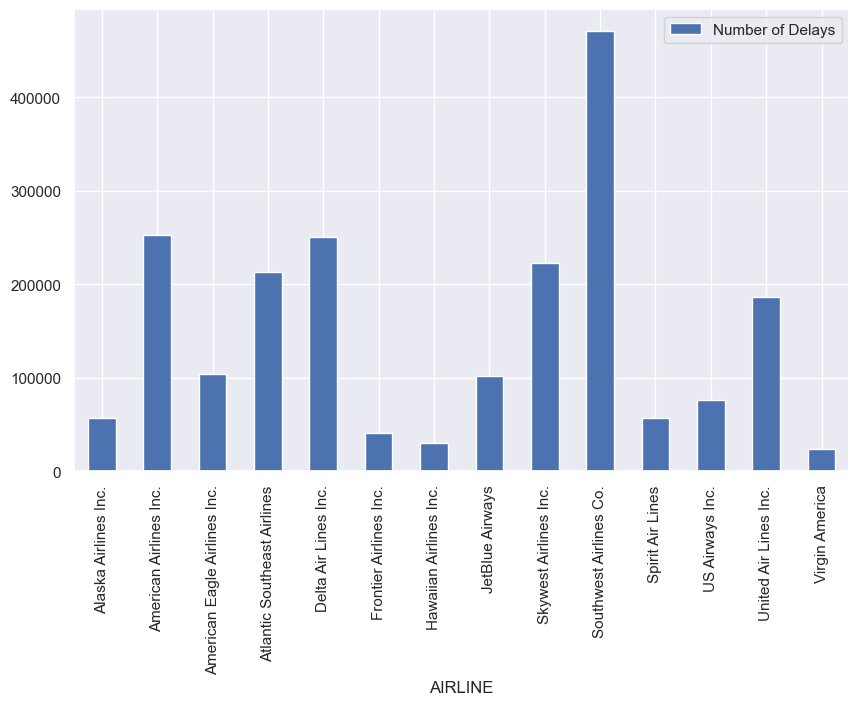

In [29]:
draw_count_delay(flight_fullname, 'AIRLINE')

In [30]:
# split by month
flight_month = flight.loc[:, ['MONTH']].groupby('MONTH').sum()
get_airline = flight.AIRLINE.unique()

for a in get_airline:
    flight_month[a] = flight_airline(a).loc[:, ['MONTH', 'DELAY_OR_NOT']]\
                                        .groupby('MONTH').sum()
#set full name
flight_month.columns = flight_fullname.AIRLINE.unique()

1. Creating a DataFrame flight_month grouped by month:
Selects the 'MONTH' column from the flight DataFrame and groups the data by month, summing up the values for each month.
2. Iterating over unique airline codes:
Retrieves unique airline codes using flight.AIRLINE.unique().
For each unique airline code (a), the script performs the following:
Filters the flight DataFrame using the flight_airline(a) function to select rows corresponding to that specific airline.
Within the loop, creates a new column in the flight_month DataFrame for each airline.
Groups the filtered data by month and calculates the sum of delays for each month ('DELAY_OR_NOT' column).
Assigns these summed delay values to their respective months and airlines in the flight_month DataFrame.
3. Setting full airline names as column names:
Assigns the full names of the airlines from the flight_fullname DataFrame as column names to the flight_month DataFrame.

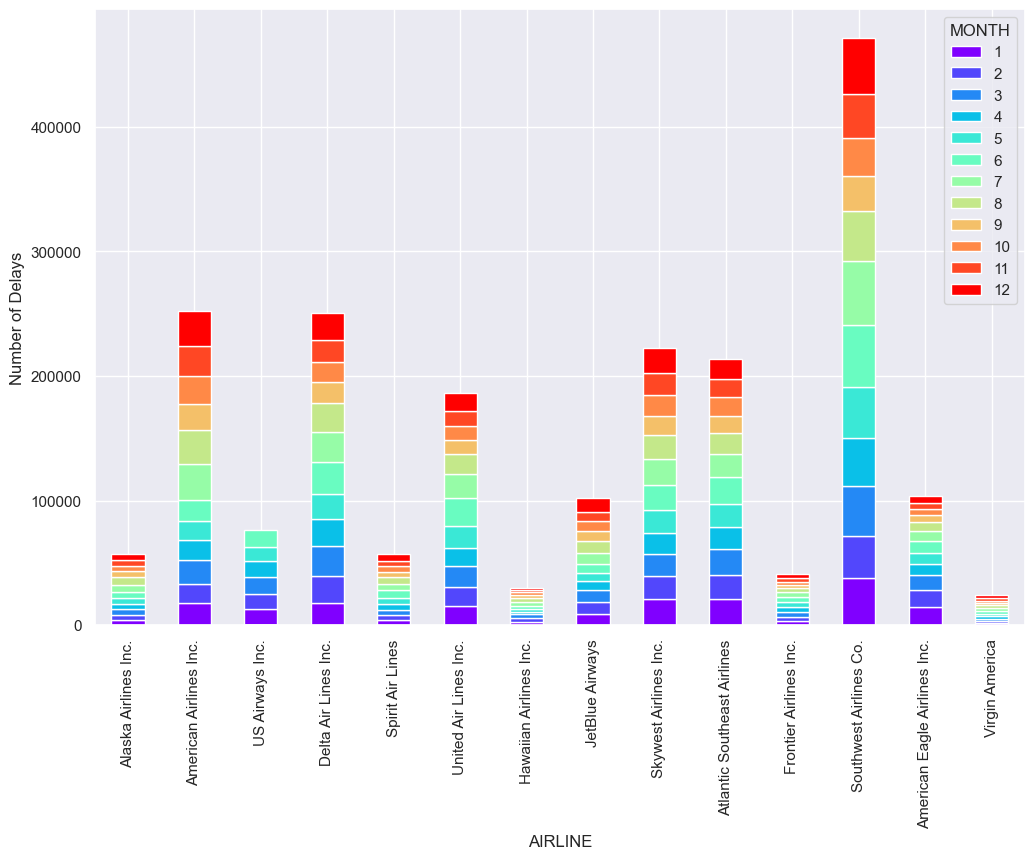

In [31]:
ax = flight_month.T.plot(kind='bar', stacked=True, figsize=(12,8), colormap='rainbow')
ax.set(ylabel='Number of Delays', xlabel='AIRLINE')
plt.show()

flight_month.T.plot(kind='bar', stacked=True, figsize=(12,8), colormap='rainbow'):

.T: Transposes the DataFrame, switching the rows and columns. This is often done to facilitate plotting when the columns contain the data to be plotted.
.plot(kind='bar', stacked=True, figsize=(12,8), colormap='rainbow'): Generates a stacked bar plot.
kind='bar': Specifies the type of plot as a bar plot.
stacked=True: Represents the data in a stacked format, where each bar segment represents a month, and different colors within each bar segment represent different airlines.
figsize=(12,8): Sets the size of the figure (width=12 inches, height=8 inches).
colormap='rainbow': Chooses the color map for the bars.
ax.set(ylabel='Number of Delays', xlabel='AIRLINE'):

Sets the labels for the y-axis (Number of Delays) and x-axis (AIRLINE) of the plot.

plt.show(): Displays the generated stacked bar plot.

In [32]:
# view the market share of these airlines

def airline_marketshare(data=flight_fullname, by='AIRLINE', titlehere='Market Share of Airlines in 2015'):
    df = data.loc[:, [by]]
    df['Share %'] = 1
    top = df.groupby(by).sum().sort_values(by='Share %',ascending=False)
    top = top.reset_index()
    
    sharePlot = top['Share %'].plot.pie(subplots=True,
                                         autopct='%0.2f%%',
                                         fontsize=12,
                                         figsize=(10,10),
                                         legend=False,
                                         labels=top[by],
                                         shadow=False,
                                         explode=(0.01,0.02,0.03,0.04,0.05,0.06,
                                                  0.07,0.08,0.1,0.15,
                                                  0.2,0.25,
                                                  0.3,0.35)[:len(data[by].unique())],
                                         startangle=90,
                                         colormap='summer',
                                         title=titlehere
                                       )
    
    plt.show()

Parameters:

data: Represents the DataFrame containing airline data (default is flight_fullname).
by: Specifies the column name in the DataFrame representing airlines (default is 'AIRLINE').
titlehere: Represents the title for the pie chart (default is 'Market Share of Airlines in 2015').
Functionality:

df = data.loc[:, [by]]: Creates a DataFrame (df) by selecting the column specified by by (e.g., 'AIRLINE') from the provided DataFrame (data).
df['Share %'] = 1: Adds a new column 'Share %' to the DataFrame df and sets all its values to 1.
top = df.groupby(by).sum().sort_values(by='Share %', ascending=False): Groups the data by the specified column ('AIRLINE') and calculates the sum of the 'Share %' column for each unique airline, sorting the values in descending order.
top = top.reset_index(): Resets the index of the DataFrame top.
Pie Chart:

top['Share %'].plot.pie(...): Generates a pie chart to represent the market share of airlines:
subplots=True: Specifies to generate separate subplots for each pie chart.
autopct='%0.2f%%': Displays the percentage values with two decimal places.
fontsize=12: Sets the font size of the pie chart labels.
figsize=(10,10): Determines the size of the pie chart (width=10 inches, height=10 inches).
legend=False: Disables the legend.
labels=top[by]: Sets the labels for each slice in the pie chart.
shadow=False: Disables shadow effect.
explode=(...): Specifies the extent to which each slice should be separated from the center.
startangle=90: Determines the start angle for drawing the pie chart (90 degrees in this case).
colormap='summer': Chooses the color map for the pie chart slices.
title=titlehere: Sets the title of the pie chart.

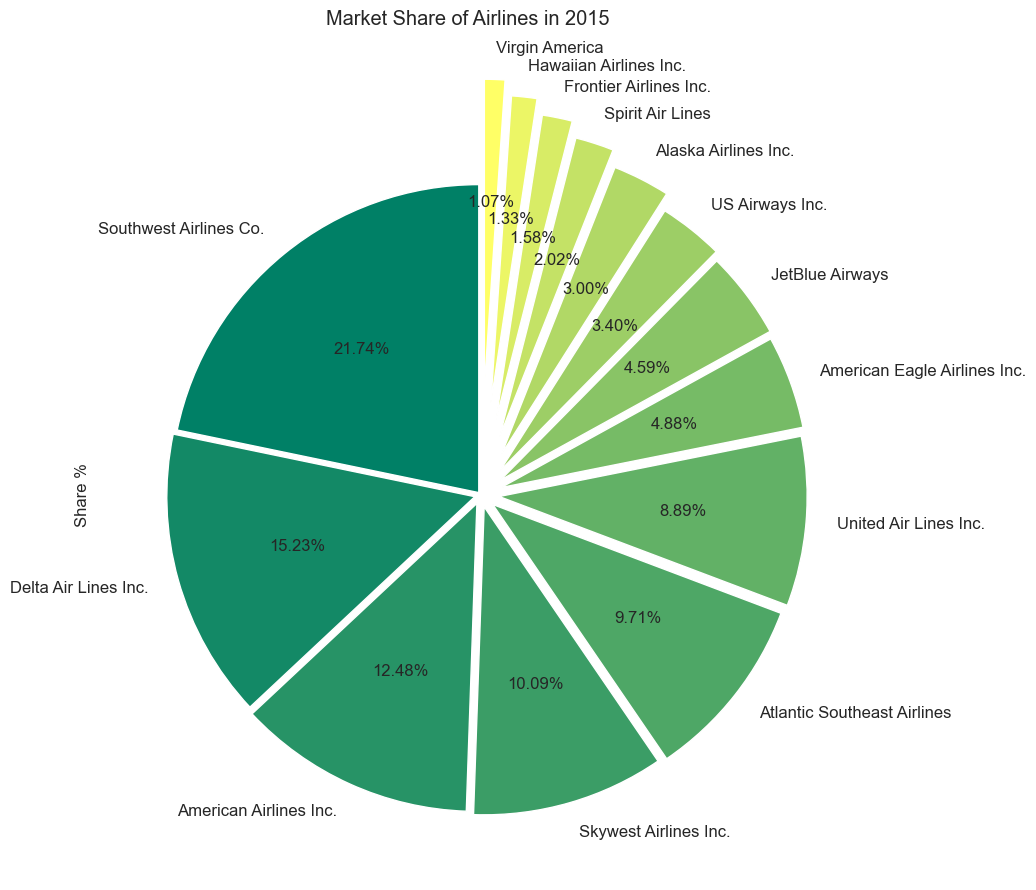

In [33]:
airline_marketshare()

In [34]:
def draw_pct_delay(data, select, kind='bar'):
    data_select = (100*(data.loc[:, [select, 'DELAY_OR_NOT']].groupby(select).sum())
                   /(data.loc[:, [select, 'DELAY_OR_NOT']].groupby(select).count()))
    data_select.plot(kind=kind)
    plt.show()

Parameters:

data: Represents the DataFrame containing flight data.
select: Specifies the column name (e.g., 'MONTH', 'DAY_OF_WEEK', etc.) by which you want to group the data.
kind='bar': Determines the type of plot to be generated. By default, it generates a bar plot.

Functionality:

data.loc[:, [select, 'DELAY_OR_NOT']].groupby(select).sum(): Groups the DataFrame data by the specified select column and calculates the sum of delays ('DELAY_OR_NOT') within each group.
data.loc[:, [select, 'DELAY_OR_NOT']].groupby(select).count(): Groups the DataFrame data by the specified select column and calculates the count of entries within each group.
Calculates the percentage of delays for each category by dividing the sum of delays by the total count of entries, multiplied by 100 to get the percentage.
Generates a bar plot (kind='bar') showing the percentage of delays for each category.

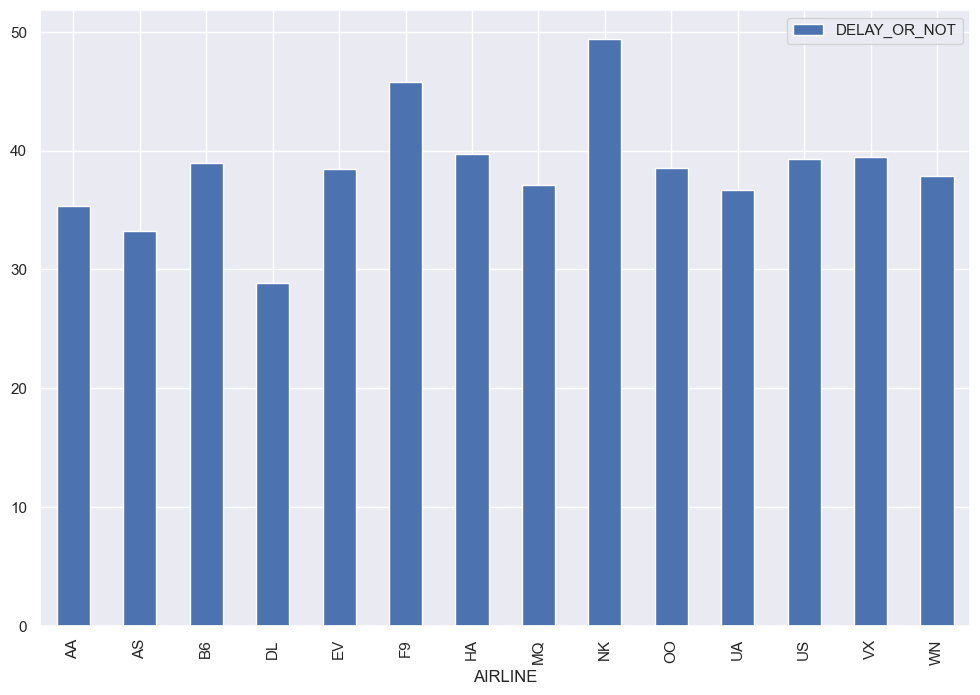

In [35]:
draw_pct_delay(flight, 'AIRLINE')

In [36]:
def draw_pct_delay_month(data, select, kind='bar'):
    for m in range(12):
        data_select['{}'.format(m)] = (100*(data.loc[:, [select, 'DELAY_OR_NOT']].groupby(select).sum())
                       /(data.loc[:, [select, 'DELAY_OR_NOT']].groupby(select).count()))
    data_select.plot(kind=kind, stacked=True)
    plt.show()

Parameters:

data: Represents the DataFrame containing flight data.
select: Specifies the column name (e.g., 'MONTH', 'DAY_OF_WEEK', etc.) by which you want to group the data.
kind='bar': Determines the type of plot to be generated. By default, it generates a bar plot.
Functionality:

The function iterates through each month (from 0 to 11 for the range of 12, representing the months in Python).
For each month (m):
Calculates the percentage of delays within each month and creates a new column labeled as the respective month number (0 to 11) in the data_select DataFrame.
This calculation involves grouping the DataFrame data by the specified select column (e.g., 'MONTH'), calculating the sum of delays and the count of entries within each group, and then computing the percentage of delays for each category.

Generating the Stacked Bar Plot:

data_select.plot(kind=kind, stacked=True): Generates a stacked bar plot using the data_select DataFrame with percentages of delays for each month.

In [37]:
flight_month_pct = flight.loc[:, ['MONTH']].groupby('MONTH').sum()
airline = flight.AIRLINE.unique()

for a in airline:
    flight_a = flight_airline(a)
    flight_month_pct[a] = 100*(flight_a.loc[:, ['MONTH', 'DELAY_OR_NOT']].groupby('MONTH').sum()
                          /flight_a.shape[0])
flight_month_pct.columns = flight_fullname.AIRLINE.unique()

In [38]:
flight_month_pct.T

MONTH,1,2,3,4,5,6,7,8,9,10,11,12
Alaska Airlines Inc.,2.60,2.31,2.63,2.33,2.79,2.89,3.21,3.74,2.63,2.63,2.64,2.82
American Airlines Inc.,2.52,2.14,2.62,2.27,2.20,2.37,4.04,3.77,2.95,3.17,3.37,3.95
US Airways Inc.,6.54,6.46,6.90,6.63,5.77,6.98,NaN,NaN,NaN,NaN,NaN,NaN
Delta Air Lines Inc.,2.02,2.48,2.79,2.51,2.25,2.96,2.81,2.70,1.91,1.82,2.07,2.50
Spirit Air Lines,3.57,3.58,3.51,3.74,4.75,5.19,4.41,4.84,3.67,3.69,3.88,4.55
United Air Lines Inc.,3.02,3.02,3.24,2.96,3.44,4.37,3.79,3.18,2.20,2.31,2.30,2.84
Hawaiian Airlines Inc.,3.72,3.99,3.89,2.76,3.09,3.19,3.67,4.47,3.51,2.95,2.06,2.39
JetBlue Airways,3.30,3.82,3.55,2.80,2.35,2.90,3.44,3.70,2.89,3.11,2.83,4.23
Skywest Airlines Inc.,3.64,3.23,3.08,2.94,3.16,3.52,3.50,3.46,2.63,2.89,2.98,3.55
Atlantic Southeast Airlines,3.72,3.47,3.81,3.25,3.28,3.87,3.40,3.03,2.41,2.76,2.64,2.81


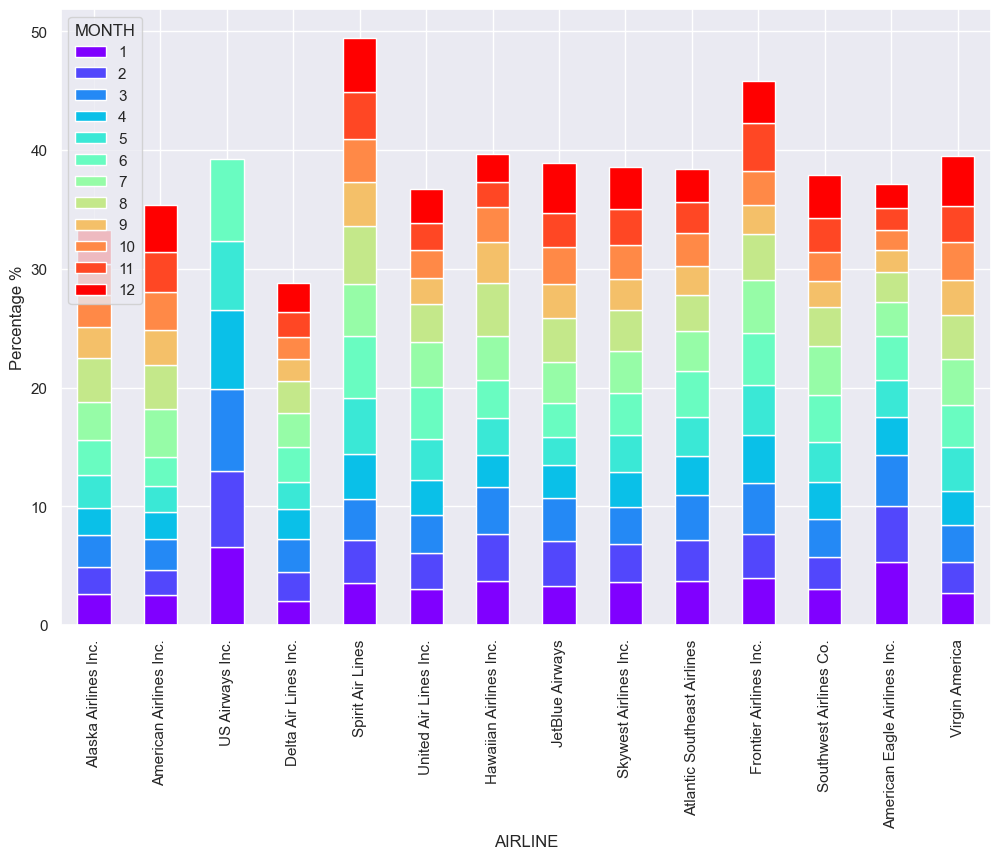

In [39]:
ax = flight_month_pct.T.plot.bar(figsize=(12,8), stacked=True, colormap='rainbow')
ax.set(ylabel='Percentage %',xlabel='AIRLINE')
plt.show()

flight_month_pct.T.plot.bar(figsize=(12,8), stacked=True, colormap='rainbow'):

.T: Transposes the DataFrame, switching the rows and columns. This is often done to facilitate plotting when the columns contain the data to be plotted.
.plot.bar(): Generates a bar plot.
figsize=(12,8): Determines the size of the figure (width=12 inches, height=8 inches).
stacked=True: Represents the data in a stacked format, where each bar segment represents a month, and different colors within each bar segment represent different airlines.
colormap='rainbow': Chooses the color map for the bars.
ax.set(ylabel='Percentage %', xlabel='AIRLINE'):

Sets the labels for the y-axis (Percentage %) and x-axis (AIRLINE) of the plot.
plt.show():

Displays the generated stacked bar plot.

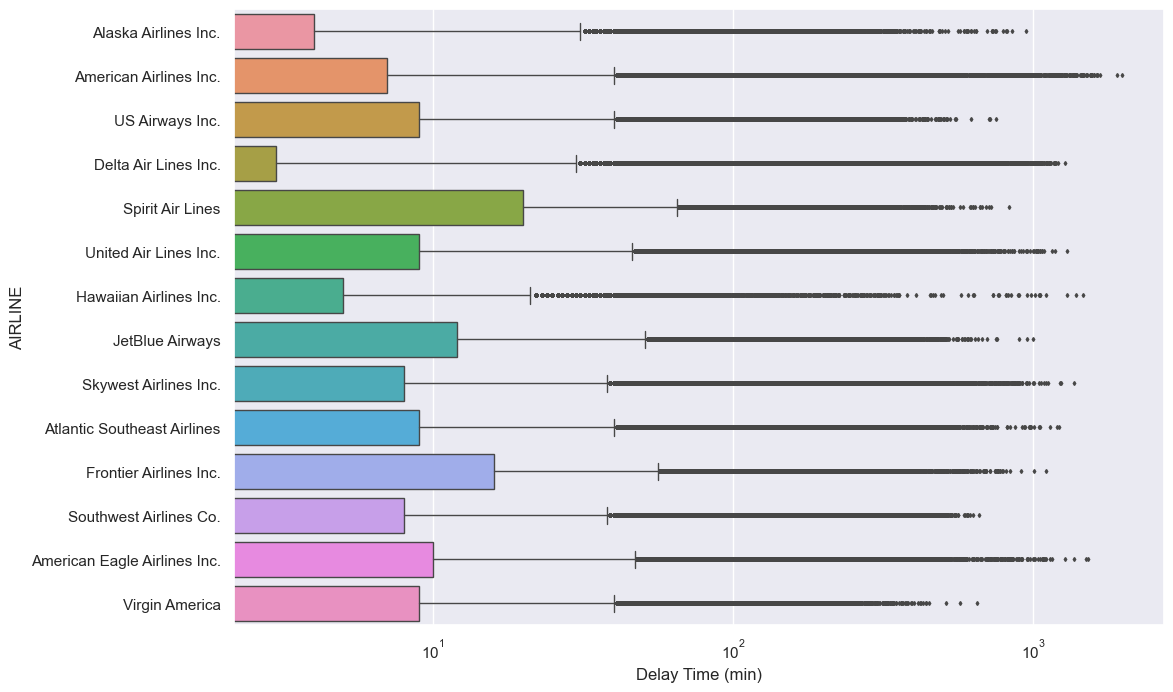

In [40]:
# boxplot of delay time (min) and airlines

a = flight_fullname.loc[:, ['ARRIVAL_DELAY','AIRLINE']]
ax = sns.boxplot(y='AIRLINE', x='ARRIVAL_DELAY', data=a, linewidth=1, fliersize=2)
ax.set(xscale="log", xlabel='Delay Time (min)') #will ignore the negative value (no delays)
plt.show()

a = flight_fullname.loc[:, ['ARRIVAL_DELAY','AIRLINE']]:

Creates a DataFrame a containing two columns: 'ARRIVAL_DELAY' (arrival delay times) and 'AIRLINE' (airline names), extracted from the flight_fullname DataFrame.
ax = sns.boxplot(y='AIRLINE', x='ARRIVAL_DELAY', data=a, linewidth=1, fliersize=2):

sns.boxplot: Initiates the creation of a boxplot using Seaborn.
y='AIRLINE', x='ARRIVAL_DELAY': Specifies that on the y-axis, the plot should display airlines, and on the x-axis, it should display arrival delay times.
data=a: Instructs Seaborn to use the data from the DataFrame a.
linewidth=1, fliersize=2: Adjusts the width of the lines and the size of the outlier points in the boxplot.
ax.set(xscale="log", xlabel='Delay Time (min)'):

xscale="log": Sets the x-axis scale to logarithmic, likely to accommodate a wide range of delay times, excluding negative values (assuming there are no negative delays).
xlabel='Delay Time (min)': Assigns a label to the x-axis indicating the delay time in minutes.

plt.show():

Displays the generated boxplot.

## Airports

In [41]:
# read airport data for longitude and latitude
# so we can draw it in the map
airport = pd.read_csv(path+'airports.csv')

In [42]:
# get the delay rate of (origin or destination) airports
def get_airport_plot(select):
    data_select = airport.rename(columns={'IATA_CODE': select})
    data_select_plot = pd.merge(data_select,
                               flight.loc[:, [select, 'DELAY_OR_NOT']]\
                               .groupby(select).mean().reset_index())
    
    data_select_plot['text_plot'] = ('Airport: ' + data_select_plot['AIRPORT'] + '<br>' 
                                    + 'City: ' + data_select_plot['CITY'] + '<br>'
                                    + 'State: ' + data_select_plot['STATE'] + '<br>'
                                    + 'Percentage of Delay: '
                                    + ((data_select_plot['DELAY_OR_NOT']*10000)\
                                       .astype(int)/100).astype(str) + '%<br>')
    
    return data_select_plot

Parameters:

select: Represents the selection of either 'origin' or 'destination' airports.

Functionality:

Renames the 'IATA_CODE' column in the airport DataFrame to the specified select value ('origin' or 'destination').
Merges the renamed airport DataFrame with a subset of the flight DataFrame, which includes the selected airport column (select) and the 'DELAY_OR_NOT' column. It calculates the mean delay rate for each airport.
Creates a new column named 'text_plot', which combines various airport-related information (airport name, city, state) along with the calculated delay rate percentage.

Returns:

Returns the DataFrame data_select_plot, which contains information about the selected airports (select) along with their respective delay rates and related information.

In [43]:
airport_origin_plot = get_airport_plot('ORIGIN_AIRPORT')
# airport_origin_plot.head()

In [44]:
#colorscale made for plotting
scale = [[0.0, 'rgb(0,100,0)'],[0.2, 'rgb(34,139,34)'],
         [0.4, 'rgb(60,179,60)'],[0.6, 'rgb(173,255,47)'],
         [0.8, 'rgb(255,215,0)'],[1.0, 'rgb(255,99,71)']]
# draw the (origin or destination) airports in the map w.r.t delay rate
def delay_pct(dataplot, titlehere, filename):
    #data
    data = [dict(type='scattergeo',
                 lat=dataplot['LATITUDE'],
                 lon=dataplot['LONGITUDE'],
                 marker=dict(
                     autocolorscale=False, 
                     cmax=50, 
                     cmin=0, 
                     color= dataplot['DELAY_OR_NOT']*100,
                     colorbar=dict(title="Percentage of Delay (%)"), 
                     colorscale=scale, #'Viridis' 
                     line=dict(
                         color="rgba(102,102,102)", 
                         width=1
                     ), 
                     opacity=0.8, 
                     size=8
                 ),

                 text=dataplot['text_plot'],
                 mode='markers',
                )]
    
    #layout
    layout = dict(title= titlehere + '<br> Hover for value',
                 geo=dict(scope='USA',
                          projection=dict(type='albers usa'),
                          showlakes=True,
                          showland=True,
                          lakecolor='rgb(95,145,237)',
                          landcolor='rgb(250,250,250)',
                         )
                 )
    
    fig = dict(data=data, layout=layout)
    return py.iplot(fig, validate=False, filename=filename)

Parameters:

dataplot: DataFrame containing airport data along with delay rates.
titlehere: Title for the plot.
filename: Name for the file that will be generated.
scale:

Defines a custom colorscale with color stops and their corresponding RGB values for different delay rate percentages.

Functionality:

Constructs a plot using Plotly's scattergeo trace.
Sets the latitude and longitude coordinates for each airport marker.
Configures marker attributes such as size, color, text to be displayed upon hover, opacity, and line properties.
Defines the layout settings for the plot, specifying the title, geographical scope (USA), projection type, and colors for lakes and land.

Returns:

Generates a Plotly plot (py.iplot) using the provided data and layout configurations, showcasing origin or destination airports on a geographical map. This plot displays airport markers with varying colors representing different delay rates, allowing users to hover over markers to view detailed delay rate information.

In [46]:
delay_pct(airport_origin_plot, 'Flight Delay Rate of Origin Airports in 2015', 'Delay_2015_Origin')

In [47]:
airport_destination_plot = get_airport_plot('DESTINATION_AIRPORT')
# airport_destination_plot.head()

In [48]:
delay_pct(airport_destination_plot, 'Flight Delay Rate of Destination Airports in 2015', 'Delay_2015_Destination')

In [49]:
# get the delay time info w.r.t (origin or destination) airports
def get_airport_delaytime_plot(select, val):
    #merge flight dataset and airport dataset
    data_select = airport.rename(columns={'IATA_CODE': select})
    data_select_plot = pd.merge(data_select,
                               flight.loc[:, [select, val]]\
                               .groupby(select).mean().reset_index())
    
    #for the hover text when plotting
    data_select_plot['text_plot'] = ('Airport: ' + data_select_plot['AIRPORT'] + '<br>' 
                                    + 'City: ' + data_select_plot['CITY'] + '<br>'
                                    + 'State: ' + data_select_plot['STATE'] + '<br>'
                                    + 'Average Delay Minutes: '
                                    + ((data_select_plot[val]*100)\
                                       .astype(int)/100).astype(str) + '<br>')
    
    return data_select_plot

Parameters:

select: Represents the selection of either 'origin' or 'destination' airports.
val: Indicates the column representing the delay time information ('ARRIVAL_DELAY', 'DEPARTURE_DELAY', etc.).

Functionality:

Renames the 'IATA_CODE' column in the airport DataFrame to the specified select value ('origin' or 'destination').
Merges the renamed airport DataFrame with a subset of the flight DataFrame, including the selected airport column (select) and the specified delay time column (val). It calculates the mean delay time for each airport.
Creates a new column named 'text_plot' containing formatted text for plotting, combining airport-related information (name, city, state) with the calculated average delay time.

Returns:

Returns the DataFrame data_select_plot, which contains information about the selected airports (select) along with their respective average delay times and related information.

In [50]:
airport_origin_delaytime_plot = get_airport_delaytime_plot('ORIGIN_AIRPORT', 'ARRIVAL_DELAY')
# airport_origin_delaytime_plot.head()

In [51]:
# delay as origin vs. delay as destination (delay rate)
a = airport_origin_plot.rename(columns={'ORIGIN_AIRPORT': 'APT',
                                        'DELAY_OR_NOT': 'DELAYasORIGIN'})
b = airport_destination_plot.rename(columns={'DESTINATION_AIRPORT': 'APT',
                                             'DELAY_OR_NOT': 'DELAYasDEST'})
c = a.loc[:,['APT','DELAYasORIGIN']].merge(b.loc[:,['APT','DELAYasDEST']], on='APT')
c.set_index('APT').corr()

,DELAYasORIGIN,DELAYasDEST
DELAYasORIGIN,1.00,0.54
DELAYasDEST,0.54,1.00


Rename Columns and Create DataFrames:

a is created by renaming columns in the airport_origin_plot DataFrame to 'APT' and 'DELAYasORIGIN'.
b is created by renaming columns in the airport_destination_plot DataFrame to 'APT' and 'DELAYasDEST'.

Merging DataFrames:

c is formed by merging selected columns ('APT' and 'DELAYasORIGIN') from DataFrame a with similar columns ('APT' and 'DELAYasDEST') from DataFrame b based on the 'APT' column.

Correlation Calculation:

The set_index('APT').corr() method is applied to DataFrame c after setting the index as 'APT'.
The corr() function calculates the correlation coefficient between the 'DELAYasORIGIN' and 'DELAYasDEST' columns.


The resulting correlation coefficient would indicate the strength and direction of the linear relationship between the delay rates of airports when they are used as origin points compared to when they are used as destination points. A positive correlation indicates that delays as origin airports tend to correspond to delays as destination airports, while a negative correlation implies an inverse relationship. A correlation near 1 or -1 indicates a stronger linear relationship, whereas a correlation near 0 indicates a weak relationship between the delay rates.

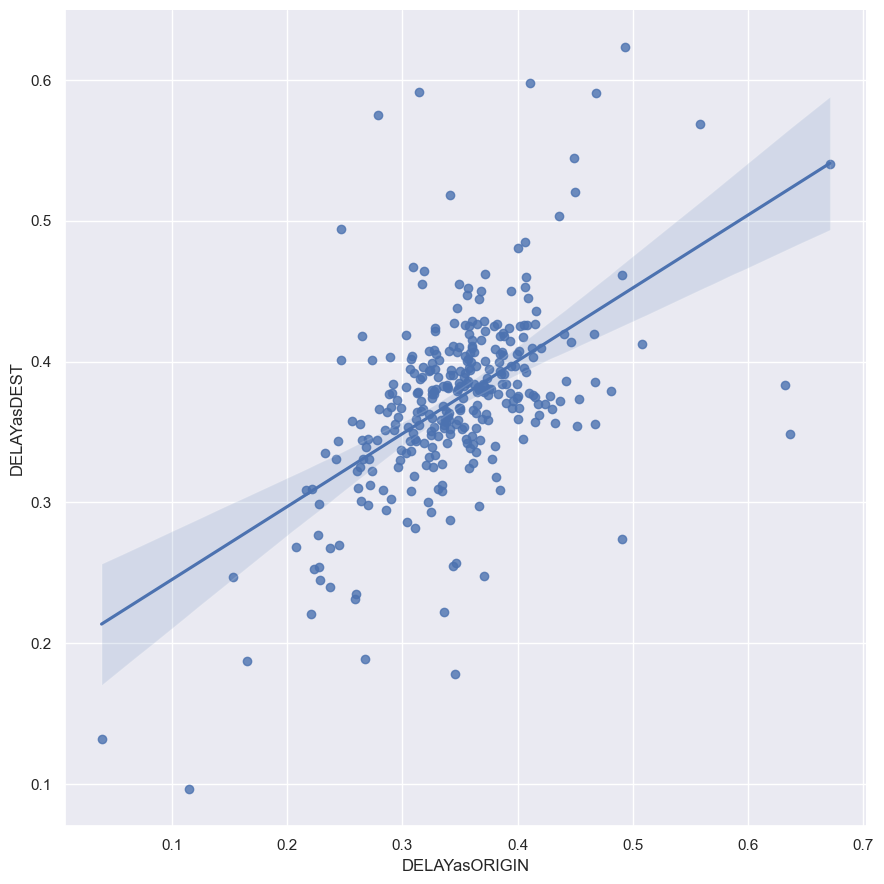

In [52]:
# delay as origin vs. delay as destination (delay rate)
sns.lmplot(x='DELAYasORIGIN', y='DELAYasDEST',
           data=c, height=9)
plt.show()

In [53]:
#draw the (origin or destination) airports in the map visualized by delay time
def delay_time(dataplot, titlehere, filename):
    #data
    data = [dict(type='scattergeo',
                 lat=dataplot['LATITUDE'],
                 lon=dataplot['LONGITUDE'],
                 marker=dict(
                     autocolorscale=False, 
                     cmax=15, 
                     cmin=-20, 
                     color= dataplot[dataplot.columns[-2]],
                     colorbar=dict(title="Average Delay Minutes"), 
                     colorscale=scale, #'Viridis' 
                     line=dict(
                         color="rgba(102,102,102)", 
                         width=1
                     ), 
                     opacity=0.8, 
                     size=8
                 ),

                 text=dataplot['text_plot'],
                 mode='markers',
                )]
    
    #layout
    layout = dict(title=titlehere + '<br> Hover for value',
                 geo=dict(scope='USA',
                          projection=dict(type='albers usa'),
                          showlakes=True,
                          showland=True,
                          lakecolor='rgb(95,145,237)',
                          landcolor='rgb(250,250,250)',
                         )
                 )
    
    fig = dict(data=data, layout=layout)
    return py.iplot(fig, validate=False, filename=filename)

Parameters:

dataplot: DataFrame containing airport data along with average delay times.
titlehere: Title for the plot.
filename: Name for the file that will be generated.
scale:

Defines a custom colorscale with color stops and their corresponding RGB values for different delay times.
Functionality:

Constructs a plot using Plotly's scattergeo trace.
Sets the latitude and longitude coordinates for each airport marker.
Configures marker attributes such as size, color (based on average delay times), text to be displayed upon hover, opacity, and line properties.
Defines the layout settings for the plot, specifying the title, geographical scope (USA), projection type, and colors for lakes and land.
Returns:

Generates a Plotly plot (py.iplot) using the provided data and layout configurations. This plot showcases origin or destination airports on a geographical map, with markers colored based on their average delay times, allowing users to hover over markers to view detailed delay time information.

This function aims to create an interactive geographical plot (map) where airports are visualized based on their average delay times, providing insights into the delay patterns across different locations.

In [54]:
delay_time(airport_origin_delaytime_plot, 'Average Flight Delay Time of Origin Airports in 2015', 'Avg_DelayTime_Origin')

In [55]:
airport_dest_delaytime_plot = get_airport_delaytime_plot('DESTINATION_AIRPORT', 'ARRIVAL_DELAY')
# airport_dest_delaytime_plot.head()

In [56]:
delay_time(airport_dest_delaytime_plot, 'Average Flight Delay Time of Destination Airports in 2015', 'Avg_DelayTime_Destionation')

In [57]:
# delay as origin vs. delay as destination (delay time)
a = airport_origin_delaytime_plot.rename(columns={'ORIGIN_AIRPORT': 'APT',
                                        'ARRIVAL_DELAY': 'DELAYasORIGIN'})
b = airport_dest_delaytime_plot.rename(columns={'DESTINATION_AIRPORT': 'APT',
                                             'ARRIVAL_DELAY': 'DELAYasDEST'})
c = a.loc[:,['APT','DELAYasORIGIN']].merge(b.loc[:,['APT','DELAYasDEST']], on='APT')
c.set_index('APT').corr()

,DELAYasORIGIN,DELAYasDEST
DELAYasORIGIN,1.00,0.66
DELAYasDEST,0.66,1.00


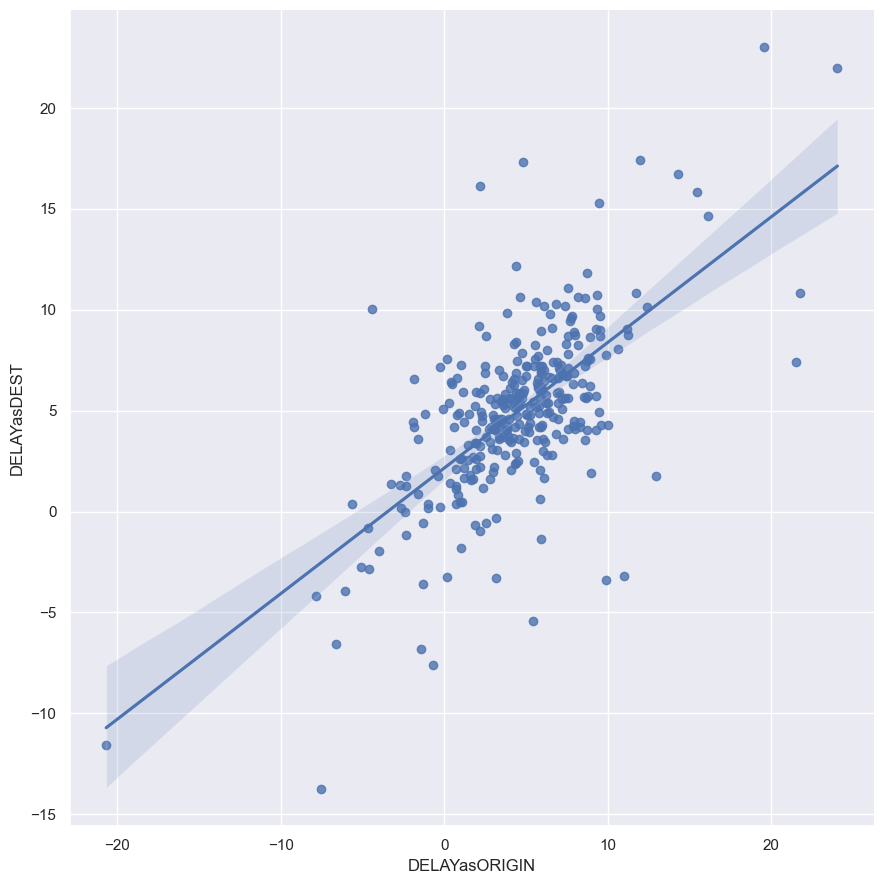

In [58]:
# delay as origin vs. delay as destination (delay time)
sns.lmplot(x='DELAYasORIGIN', y='DELAYasDEST',
           data=c, height=9)
plt.show()

In [59]:
# get the info (origin and destination airports) of each flight route
def route(flight):
    #for origin airports info
    a = flight.loc[:, ['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'ARRIVAL_DELAY']]
    a['AtoB'] = a['ORIGIN_AIRPORT'] + a['DESTINATION_AIRPORT']
    b = a.loc[:,['AtoB','ARRIVAL_DELAY']].groupby('AtoB').mean()
    b['IATA_CODE'] = b.index.str[:3]
    c = pd.merge(airport, b.reset_index())
    c.rename(columns={'IATA_CODE': 'ORIGIN_AIRPORT'}, inplace=True)
    c_sorted = c.set_index('AtoB').sort_index()
    
    #for destination airports info
    b.drop('IATA_CODE', axis=1, inplace=True)
    b['IATA_CODE'] = b.index.str[3:]
    d = pd.merge(airport, b.reset_index())
    d.rename(columns={'IATA_CODE': 'DESTINATION_AIRPORT'}, inplace=True)
    d_sorted = d.set_index('AtoB').sort_index()
    
    return (c_sorted, d_sorted)

In [61]:
#draw the route map visualized by the delay time
def delay_time_route(airline='AA'):
    #data
    
    route_origin, route_destination = route(flight_airline(airline))

    #draw the airport points in the map
    data = [dict(type='scattergeo',
                 lat=route_origin['LATITUDE'],
                 lon=route_origin['LONGITUDE'],
                 marker=dict(
                     color='#FFD700',
                     line=dict(
                         color="rgba(102,102,102)", 
                         width=1
                     ), 
                     opacity=0.8, 
                     size=6
                 ),
                 mode='markers',
                )]   
    
    #draw the flight route in the map
    for i in range(route_origin.shape[0]):
        data += [dict(
            lat=[route_origin['LATITUDE'][i], route_destination['LATITUDE'][i]], 
            line=dict(  
                color='#4682B4',
                width=1
            ), 
            locationmode="USA-states", 
            lon=[route_origin['LONGITUDE'][i], route_destination['LONGITUDE'][i]], 
            mode="lines",
            text=('From: ' + (route_origin['AIRPORT'][i]) 
                  + '<br>To: ' + route_destination['AIRPORT'][i]
                  + '<br>Avg. Delay: ' 
                  + ((route_origin['ARRIVAL_DELAY'][i]*100).astype(int)/100).astype(str) 
                  + ' mins'
                 ),
            opacity=(route_origin['ARRIVAL_DELAY'][i])/30 if (route_origin['ARRIVAL_DELAY'][i])>0 else 0, 
            type="scattergeo"
        )]
    
    #layout
    layout = dict(title='Average Delay Time of Airline {} Route in 2015'.format(airline)
                  + '<br> Hover for value',
                 geo=dict(scope='north america',
                          projection=dict(type="azimuthal equal area"),
                          showlakes=True,
                          showland=True,
                          lakecolor='rgb(95,145,237)',
                          landcolor='rgb(250,250,250)'
                         ),
                  showlegend=False
                 )
    
    fig = dict(data=data, layout=layout)
    return py.iplot(fig, validate=False, filename='Delay_Route_2015_{}'.format(airline))

In [62]:
delay_time_route('DL')

In [63]:
delay_time_route('AA')

In [64]:
delay_time_route('HA')

In [65]:
# get the main reason of a delay

delay_over15min['DELAY_REASON'] = None
for reason in delay_over15min.columns[-6:-1]:
    delay_over15min['DELAY_REASON'][delay_over15min[reason]
                                    /delay_over15min['ARRIVAL_DELAY'] > 0.5] = reason

C:\Users\OMOLP094\AppData\Local\Temp\ipykernel_664\2218647889.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\OMOLP094\AppData\Local\Temp\ipykernel_664\2218647889.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\OMOLP094\AppData\Local\Temp\ipykernel_664\2218647889.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\OMOLP094\AppData\Local\Temp\ipy

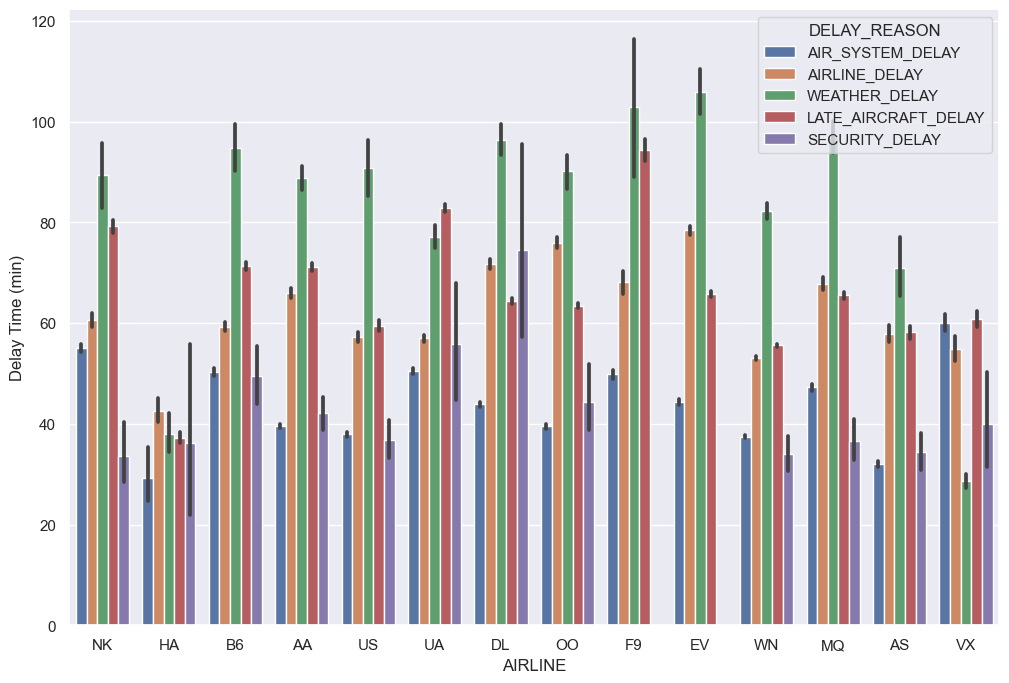

In [66]:
# find the main delay reason of each airline

# calculate the reason of delays w.r.t the delay time (min)
# i.e. if a delay occurs, how long is the delay time in this delay reason?
ax = sns.barplot(x='AIRLINE', y='ARRIVAL_DELAY',
                data=delay_over15min, 
                hue='DELAY_REASON')
ax.set(ylabel='Delay Time (min)')
plt.show()

In [67]:
# calculate the reason caused delays in percentage
# i.e. if a delay occurs, what is the probability of this delay reason?
count_delay_reason = delay_over15min.loc[:, ['AIRLINE', 'AIR_SYSTEM_DELAY',
                                             'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY',
                                             'SECURITY_DELAY', 'WEATHER_DELAY'
                                            ]]
count_delay_reason.set_index('AIRLINE', inplace=True)
count_delay_reason = 100*(((count_delay_reason>0).reset_index().groupby('AIRLINE').sum())
                      /count_delay_reason.groupby('AIRLINE').count())
count_delay_reason

,AIR_SYSTEM_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,SECURITY_DELAY,WEATHER_DELAY
AIRLINE,,,,,
AA,54.02,52.70,44.21,0.56,7.65
AS,66.65,37.41,35.19,1.12,3.88
B6,57.31,65.34,53.54,0.73,3.67
DL,54.42,53.49,42.46,0.05,10.03
EV,58.24,49.41,50.19,0.00,2.61
F9,76.65,48.86,49.38,0.00,2.46
HA,3.77,85.81,56.59,0.34,6.64
MQ,59.14,44.98,53.06,0.51,15.04
NK,82.93,50.57,34.25,0.87,2.70


Comparing with the previous bar chart, weather delays are less probable occured. However, if a weather delay happens, it will cause a longer delay time in average.

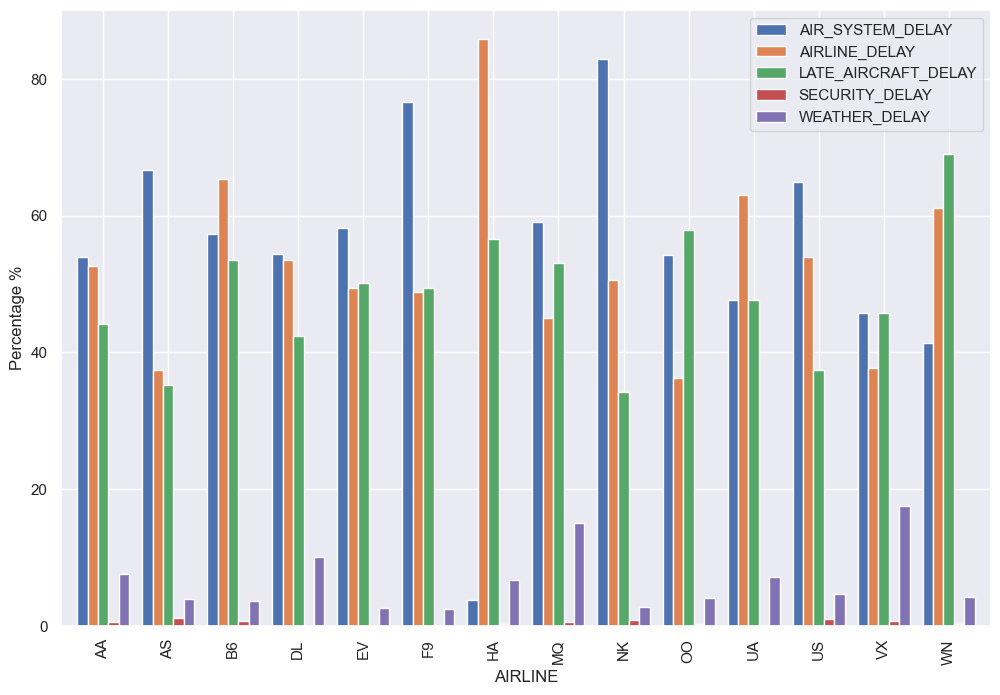

In [68]:
ax = count_delay_reason.plot.bar(width=0.8)
ax.set(ylabel='Percentage %')
plt.show()